# Proyek Analisis Data : Bike Riding Dataset

- Nama : Rafi Widyansyah
- Email : rafiwidyansyah15@gmail.com
- Id Dicoding : rafiwidyansyah

# Pertanyaan

1. Pada bulan apa bike riding mendapat order terbanyak dalam periode 1 tahun?
2. Pada musim apa bike riding mendapat order terbanyak dalam 1 tahun?
3. Bagaimana korelasi antara suhu terhadap total order bike riding?

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Menyiapkan dataset

In [2]:
data = pd.read_csv("data/day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## Merapikan Data

In [4]:
## Memeriksa apakah terdapat nilai duplikat
data.duplicated().sum()

0

Tidak terdapat adanya data yang terduplikasi dalam dataset

In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
## Mengubah tipe data pada beberapa kolom

data['dteday'] = pd.to_datetime(data['dteday'])
data['season'] = data.season.astype('category')
data['mnth'] = data.mnth.astype('category')
data['holiday'] = data.holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['workingday'] = data.workingday.astype('category')
data['weathersit'] = data.weathersit.astype('category')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [8]:
# Mengonversi data pada kolom kategori variabel berdasarkan kriteria 
# yang ditunjukkan pada file readme.txt

# Konversi nilai untuk kolom 'season' : 1:Winter, 2:Spring, 3:Summer, 4:Fall
data.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# Konversi nilai untuk kolom 'yr' : 0:2011, 1:2012
data.yr.replace((0,1), (2011,2012), inplace=True)

# Konversi nilai untuk kolom 'mnth' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
data.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Konversi nilai untuk kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
data.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

# Konversi nilai untuk kolom 'weekday' : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
data.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
data.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

In [9]:
# Drop kolom yang tidak digunakan dalam data
data = data.drop("instant", axis=1)
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
# Merubah nama kolom

data.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)

In [11]:
# Merubah nilai dari 'temp', 'atemp', 'humidity, 'windspeed' ke dalam nilai yang belum dinormalisasi

data['temp'] = data['temp']*41
data['atemp'] = data['atemp']*50
data['humidity'] = data['humidity']*100
data['windspeed'] = data['windspeed']*67

In [12]:
data.head(10)

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,2011-01-06,Winter,2011,Jan,0,Thursday,Yes,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,2011-01-07,Winter,2011,Jan,0,Friday,Yes,Misty,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,2011-01-08,Winter,2011,Jan,0,Saturday,No,Misty,6.765000,8.11270,53.5833,17.875868,68,891,959
8,2011-01-09,Winter,2011,Jan,0,Sunday,No,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,2011-01-10,Winter,2011,Jan,0,Monday,Yes,Clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [13]:
# Menyimpan dataset yang telah "dirapikan" ke dalam file csv baru
data.to_csv("data_cleaned.csv", index=False)

# Exploratory Data Analysis

## Univariate Analysis

### Histogram

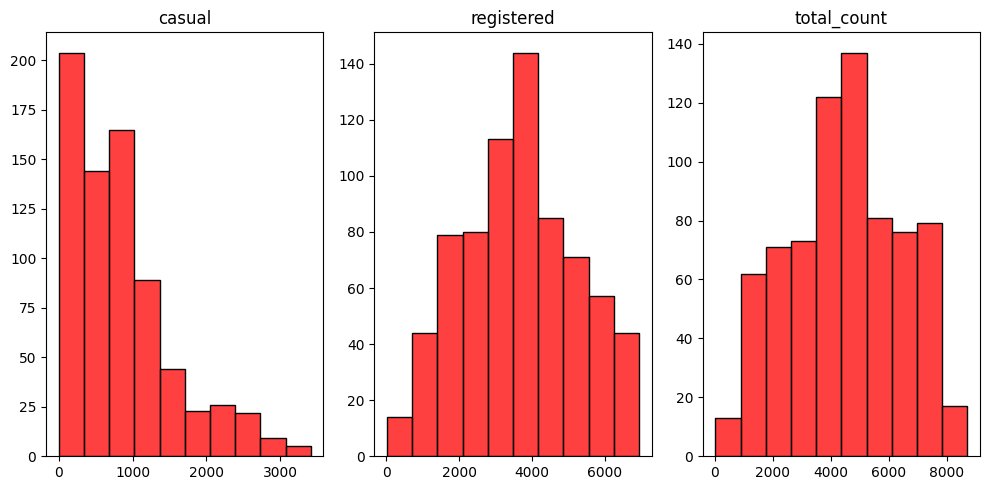

In [13]:
columns = ['casual', 'registered', 'total_count']

fig, ax = plt.subplots(1, 3, figsize=(10,5))

for i, ax in enumerate(ax):
    sns.histplot(x=data[columns[i]], ax=ax, bins=10, color='red')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

## Bivariate Analysis

### Boxplot Bikeshare Users by Seasons

C:\Users\PC\AppData\Local\Temp\ipykernel_1600\1930647412.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\PC\AppData\Local\Temp\ipykernel_1600\1930647412.py:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


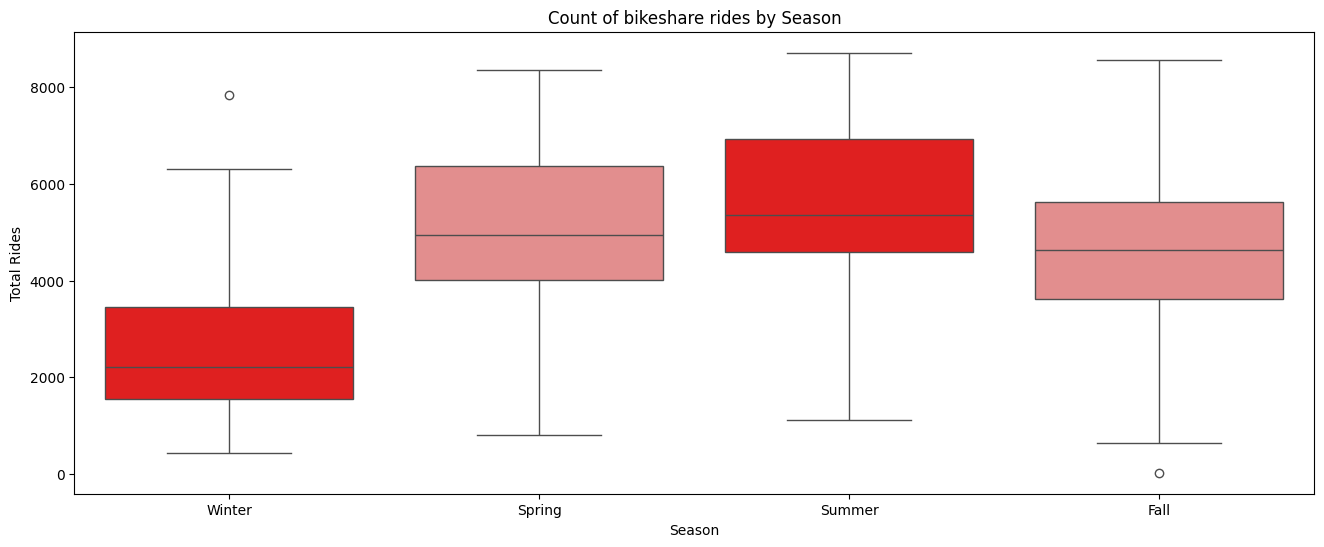

In [14]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="season",
    y="total_count",
    data=data,
    palette=["red", "lightcoral"]
)

# Add labels and a title to the plot
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

# Show the plot
plt.show()

### Boxplot Bikeshare Users by Months

C:\Users\PC\AppData\Local\Temp\ipykernel_1600\4243806749.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\PC\AppData\Local\Temp\ipykernel_1600\4243806749.py:4: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


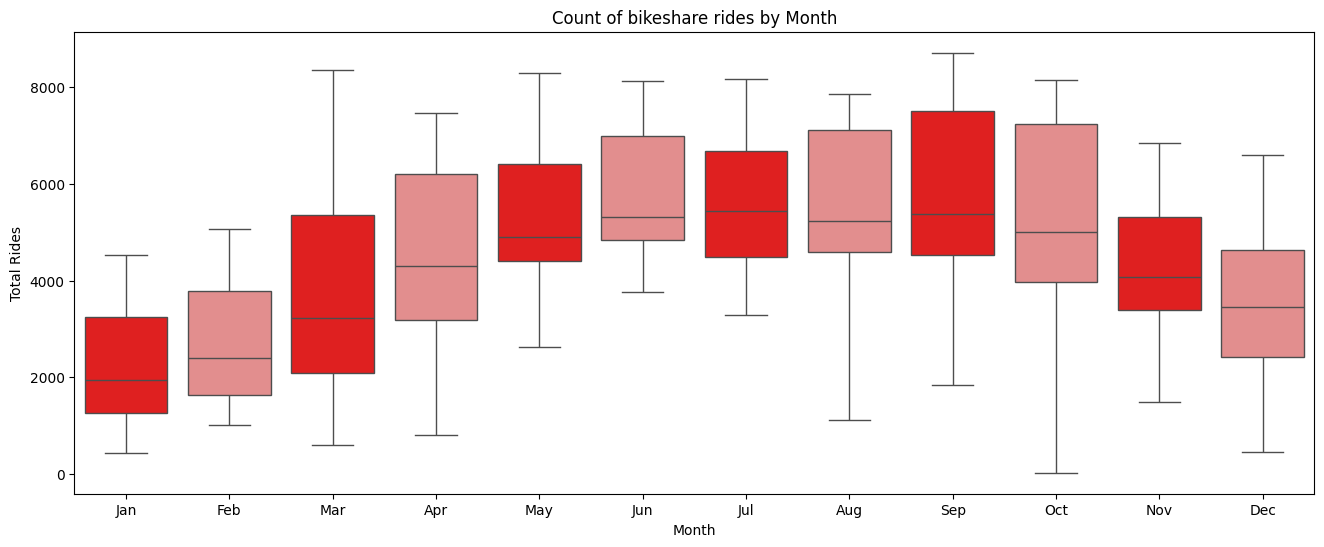

In [15]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="month",
    y="total_count",
    data=data,
    palette=["red", "lightcoral"]
)

# Add labels and a title to the plot
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Month")

# Show the plot
plt.show()

# Explanatory Data Analysis

## Pada bulan apa bike riding mendapat order terbanyak dalam periode 1 tahun?

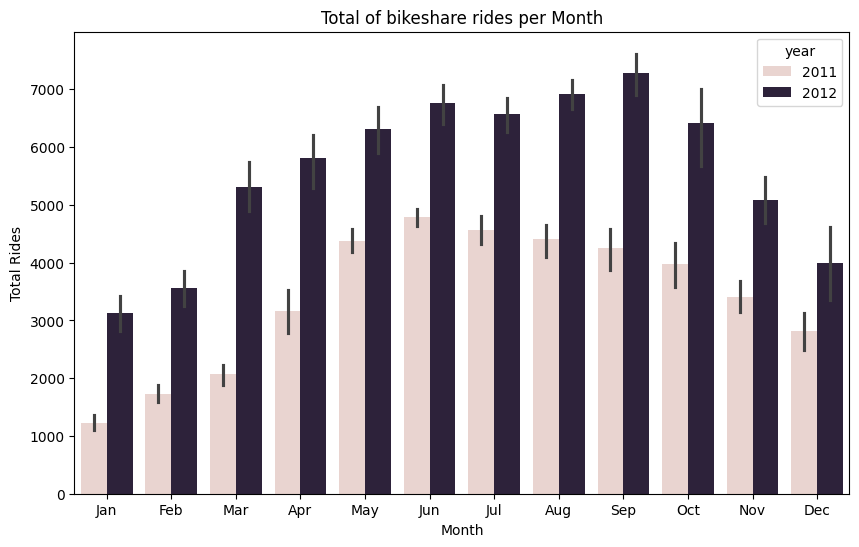

In [16]:
plt.figure(figsize=(10,6))

sns.barplot(x='month', y='total_count', data=data, hue='year')

plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Total of bikeshare rides per Month")

plt.show()

- Permintaan akan bikesharing memiliki permintaan tertinggi pada bulan 'September' untuk tahun 2012.
- Permintaan akan bikesharing memilik permintaan tertinggi pada bulan 'Juni' untuk tahun 2011.

## Pada musim apa bike riding mendapat order terbanyak dalam 1 tahun?

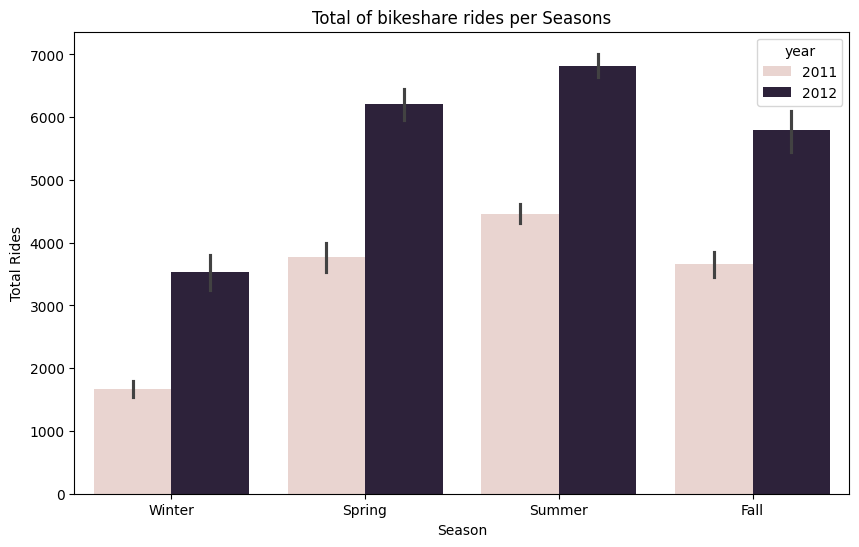

In [17]:
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='total_count', data=data, hue='year')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Total of bikeshare rides per Seasons")

plt.show()

- Permintaan akan bikesharing memiliki permintaan paling tinggi pada 'summer' untuk tahun 2011.
- Permintaan akan bikesharing memiliki permintaan paling tinggi pada 'summer' untuk tahun 2012.

## Bagaimana korelasi antara suhu terhadap total order bike riding?

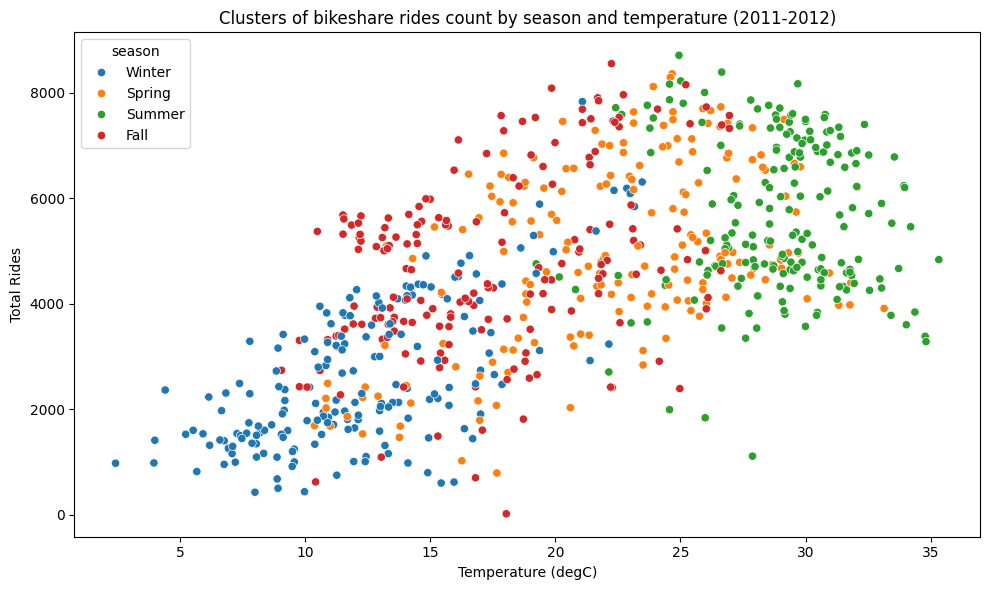

In [18]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='total_count', data=data, hue='season')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides count by season and temperature (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

- Order bikesharing memiliki nilai minimum pada 'winter'.
- Seiring dengan meningkatnya temperatur, permintaan bikesharing semakin meningkat. Permintaan akan bikesharing memiliki
  nilai tertinggi pada 'summer'.
- Permintaan akan bikesharing memiliki permintaan terbanyak pada rentang suhu 20-30 derajat Celcius atau pada periode
  'summer' dan 'fall'.

# Kesimpulan

## Pada bulan apa bike riding mendapat order terbanyak dalam periode 1 tahun?

Order bike riding memiliki order terbanyak secara berturut di bulan Juni dan September
pada tahun 2011 dan 2012.

## Pada musim apa bike riding mendapat order terbanyak dalam 1 tahun?

Musim 'summer' merupakan musim yang memiliki pengguna bikeriding terbanyak dalam 1 tahun.

## Bagaimana korelasi antara suhu terhadap total order bike riding?

- Permintaan akan bikeriding relatif rendah pada suhu kurang dari 20 derajat Celcius.
- Permintaan bikeriding relatif tinggi ketika pada suhu 25-30 derajat Celcius.